<a href="https://colab.research.google.com/github/HammadSheharyar/FYDP-MODELS/blob/main/Model_on_more_cotton_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls '/content/drive/MyDrive/Data-100%/data'

test  train  val


In [3]:
!ls '/content/drive/MyDrive/Data-100%/data/train/'

'diseased cotton leaf'
'Diseased Cotton leaf (Bacterial Disease)'
'Diseased Cotton leaf (Bacterial & Fungal Disease)'
'Diseased Cotton leaf (Bacterial & Viral Disease)'
'Diseased Cotton leaf (Fungal Disease)'
'Diseased Cotton leaf (Viral & Bacterial Disease)'
'Diseased Cotton leaf (Viral Disease)'
'diseased cotton plant'
'healthy cotton leaf'
'Healthy cotton plant'


In [4]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Data-100%"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 1 directories and 0 images in '/content/drive/MyDrive/Data-100%'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Data-100%/data'.
There are 10 directories and 0 images in '/content/drive/MyDrive/Data-100%/data/train'.
There are 0 directories and 435 images in '/content/drive/MyDrive/Data-100%/data/train/Healthy cotton plant'.
There are 0 directories and 430 images in '/content/drive/MyDrive/Data-100%/data/train/healthy cotton leaf'.
There are 0 directories and 292 images in '/content/drive/MyDrive/Data-100%/data/train/diseased cotton leaf'.
There are 0 directories and 825 images in '/content/drive/MyDrive/Data-100%/data/train/diseased cotton plant'.
There are 0 directories and 892 images in '/content/drive/MyDrive/Data-100%/data/train/Diseased Cotton leaf (Viral Disease)'.
There are 0 directories and 2444 images in '/content/drive/MyDrive/Data-100%/data/train/Diseased Cotton leaf (Fungal Disease)'.
There are 0 directories and 16 images in '/content/drive/MyDr

In [5]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/Data-100%/data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
class_names = class_names[:] # remove .DS_store
print(class_names)

['Diseased Cotton leaf (Bacterial & Fungal Disease)'
 'Diseased Cotton leaf (Bacterial & Viral Disease)'
 'Diseased Cotton leaf (Bacterial Disease)'
 'Diseased Cotton leaf (Fungal Disease)'
 'Diseased Cotton leaf (Viral & Bacterial Disease)'
 'Diseased Cotton leaf (Viral Disease)' 'Healthy cotton plant'
 'diseased cotton leaf' 'diseased cotton plant' 'healthy cotton leaf']


In [6]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['image00583.jpg']
Image shape: (222, 257, 3)


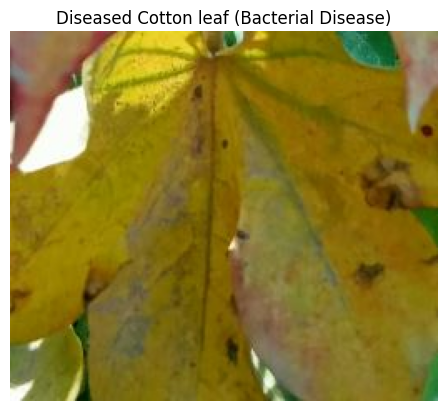

In [18]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/drive/MyDrive/Data-100%/data/train/",
                        target_class="Diseased Cotton leaf (Bacterial Disease)")

In [19]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(222, 257, 3), dtype=uint8, numpy=
array([[[151, 124, 105],
        [150, 123, 104],
        [150, 121, 103],
        ...,
        [144, 144,  92],
        [139, 142,  89],
        [131, 133,  83]],

       [[149, 122, 103],
        [148, 121, 102],
        [149, 120, 102],
        ...,
        [144, 142,  93],
        [141, 141,  91],
        [133, 135,  85]],

       [[147, 120, 103],
        [147, 120, 103],
        [147, 118, 102],
        ...,
        [145, 141,  94],
        [143, 139,  92],
        [139, 137,  89]],

       ...,

       [[251, 254, 247],
        [254, 255, 251],
        [254, 254, 252],
        ...,
        [ 52, 132,  73],
        [ 57, 136,  81],
        [ 58, 134,  87]],

       [[252, 254, 253],
        [254, 255, 255],
        [252, 252, 254],
        ...,
        [ 60, 137,  83],
        [ 70, 146,  97],
        [ 78, 151, 108]],

       [[249, 250, 252],
        [253, 254, 255],
        [252, 251, 255],
        ...,
        [ 66, 143,  8

In [20]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/Data-100%/data/train"
test_dir = "/content/drive/MyDrive/Data-100%/data/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")

print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Training images:
Found 6051 images belonging to 10 classes.
Testing images:
Found 1025 images belonging to 10 classes.


In [21]:
# Create TensorBoard callback (functionized beause we need to create a new one for each model)
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [41]:
# Model using tensor hub
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [22]:
# Import dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [23]:
IMAGE_SHAPE + (3,)

(224, 224, 3)

In [24]:
# Let's make a create_model() function to create a model from a URL
def create_model(model_url, num_classes=10):
  """
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
    layer and Dense output layer with num_classes output neurons.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the already learned patterns
                                           name="feature_extraction_lyaer",
                                           input_shape=IMAGE_SHAPE+(3,))

  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model

In [45]:
# Create EfficinetNetB0 feature extractor model - details on EfficientNet: https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html#:~:text=EfficientNet%2DB0%20is%20the%20baseline,than%20the%20best%20existing%20CNN.
efficientnet_model = create_model(model_url=efficientnet_url,
                                  num_classes=train_data_10_percent.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss="categorical_crossentropy",
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

# Fit EfficientNet model to 10% of training data
efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                              epochs=10,
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                     experiment_name="efficientnetb0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetb0/20231119-052228
Epoch 1/10
190/190 [==============================] - 1469s 8s/step - loss: 0.8361 - accuracy: 0.7123 - val_loss: 0.7166 - val_accuracy: 0.7337
Epoch 2/10
190/190 [==============================] - 31s 164ms/step - loss: 0.4794 - accuracy: 0.8328 - val_loss: 0.6241 - val_accuracy: 0.7854
Epoch 3/10
190/190 [==============================] - 32s 167ms/step - loss: 0.3952 - accuracy: 0.8605 - val_loss: 0.5897 - val_accuracy: 0.8068
Epoch 4/10
190/190 [==============================] - 35s 186ms/step - loss: 0.3478 - accuracy: 0.8799 - val_loss: 0.5609 - val_accuracy: 0.8312
Epoch 5/10
190/190 [==============================] - 31s 165ms/step - loss: 0.3148 - accuracy: 0.8916 - val_loss: 0.5484 - val_accuracy: 0.8390
Epoch 6/10
190/190 [==============================] - 31s 165ms/step - loss: 0.2868 - accuracy: 0.9063 - val_loss: 0.5312 - val_accuracy: 0.8410
Epoch 7/10
190/190 [==============================] 

In [46]:

# Evalaute on the test data
efficientnet_model.evaluate(test_data)

33/33 [==============================] - 6s 166ms/step - loss: 0.4955 - accuracy: 0.8771


[0.49552151560783386, 0.8770731687545776]

In [47]:
print("[INFO] Calculating model accuracy")
scores = efficientnet_model.evaluate(train_data_10_percent)
print(f"Train Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
190/190 [==============================] - 28s 149ms/step - loss: 0.2143 - accuracy: 0.9369
Train Accuracy: 93.68699193000793


In [48]:
print("[INFO] Calculating model accuracy")
scores = efficientnet_model.evaluate(test_data)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
33/33 [==============================] - 8s 234ms/step - loss: 0.4955 - accuracy: 0.8771
Test Accuracy: 87.70731687545776


In [25]:
# Let's create a function to plot our loss curves...
# Tidbit: you could put a function like this into a script called "helper.py" and import it when you need it...
import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow History object.

  Returns:
    Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();


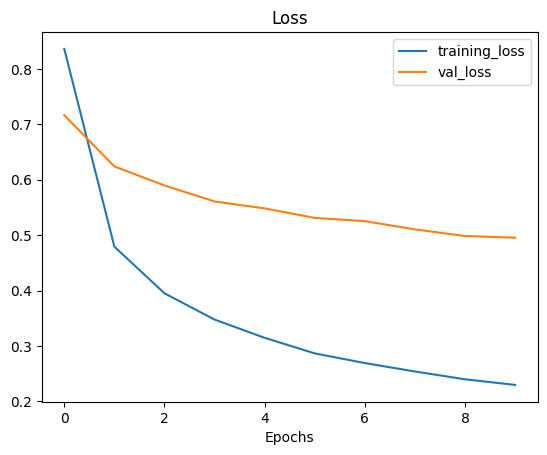

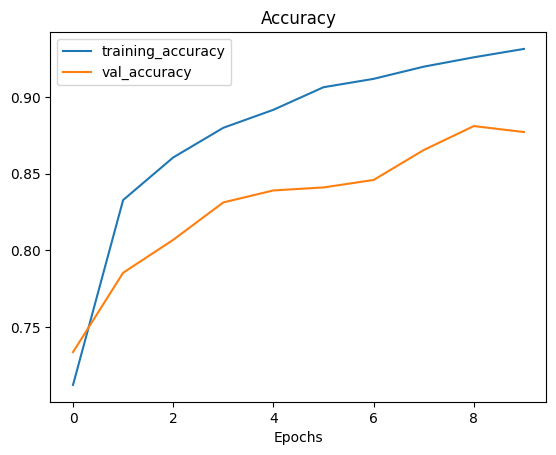

In [50]:
plot_loss_curves(efficientnet_history)

In [ ]:
efficientnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_lyaer (  (None, 1280)              4049564   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


--2023-11-19 05:54:45--  https://raw.githubusercontent.com/HammadSheharyar/FYDP-MODELS/main/cottonDis.webp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214766 (210K) [image/webp]
Saving to: ‘cottonDis.webp’

cottonDis.webp      100%[===================>] 209.73K  --.-KB/s    in 0.03s   

2023-11-19 05:54:45 (5.90 MB/s) - ‘cottonDis.webp’ saved [214766/214766]



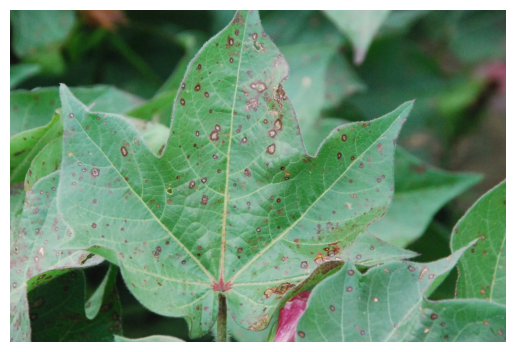

In [51]:
!wget https://raw.githubusercontent.com/HammadSheharyar/FYDP-MODELS/main/cottonDis.webp
disCottonImage = mpimg.imread("cottonDis.webp")
plt.imshow(disCottonImage)
plt.axis(False);

In [26]:
import io

In [27]:
from PIL import Image

def load_and_prep_image(filename, img_shape=224, scale=True):
    """
    Reads an image from filename, converts it to a format compatible with the model,
    and resizes it to (img_shape, img_shape, colour_channels).
    """
    # Read in the image
    img = tf.io.read_file(filename)

    # Check the image format using the file extension
    if filename.endswith('.webp'):
        # Convert the WebP image to PNG format (or any other supported format)
        with Image.open(io.BytesIO(img.numpy())) as pil_image:
            # Create a temporary buffer to save the image
            buffer = io.BytesIO()
            # Save the image as PNG (you can choose a different format if needed)
            pil_image.save(buffer, format='PNG')
            # Get the image data in PNG format
            img = buffer.getvalue()
        img = tf.convert_to_tensor(img)

    # Decode the image into a tensor
    img = tf.image.decode_image(img)

    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])

    if scale:
        # Rescale the image (get all values between 0 and 1)
        return img / 255.
    else:
        return img


In [54]:
# Load in and preprocess our custom image
disCottonImage = load_and_prep_image("cottonDis.webp")
disCottonImage

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.26218486, 0.39551818, 0.2859944 ],
        [0.18174708, 0.36213923, 0.23800394],
        [0.17270972, 0.35310185, 0.22933611],
        ...,
        [0.14856477, 0.24017347, 0.17350681],
        [0.15419292, 0.2539566 , 0.18336834],
        [0.16438983, 0.26431012, 0.20360552]],

       [[0.23529412, 0.38039216, 0.2627451 ],
        [0.17396708, 0.36612394, 0.23938201],
        [0.16943215, 0.35766745, 0.24002038],
        ...,
        [0.14872113, 0.2594783 , 0.18793683],
        [0.17002265, 0.27099985, 0.20041163],
        [0.14935601, 0.23946285, 0.18072855]],

       [[0.22252588, 0.38723177, 0.25289488],
        [0.19529937, 0.37883404, 0.25412288],
        [0.17398834, 0.38070914, 0.2583615 ],
        ...,
        [0.16074577, 0.27082786, 0.19681895],
        [0.17820556, 0.276918  , 0.20941122],
        [0.1700745 , 0.26986474, 0.20784314]],

       ...,

       [[0.5669592 , 0.6089399 , 0.58675003],
        [0.57

In [28]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 1s 1s/step


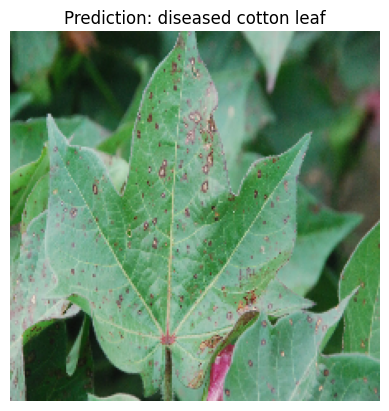

In [56]:
# Make a prediction using model_10
pred_and_plot(model=efficientnet_model,
              filename="cottonDis.webp",
              class_names=class_names)

Save Model


In [77]:
efficientnet_model.save('/content/drive/MyDrive/Colab Notebooks/Model/100%data_plant_disease_efficientnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 25ms/step


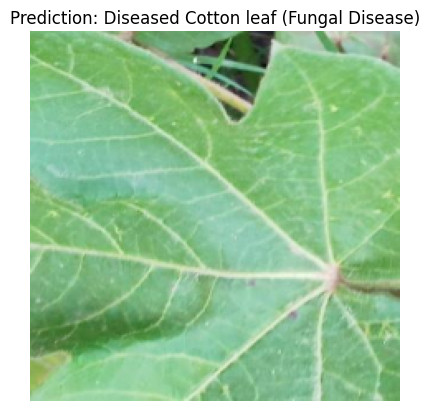

In [82]:
# Make a prediction using model_10
pred_and_plot(model=efficientnet_model,
              filename="image00433.jpg",
              class_names=class_names)

## **Let's compare our model with Resnet50 model**  




In [29]:
# Let's compare the  models
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [30]:
# Import dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [31]:
IMAGE_SHAPE + (3,)

(224, 224, 3)

In [32]:
# Create Resnet model
resnet_model = create_model(resnet_url,
                            num_classes=train_data_10_percent.num_classes)

In [33]:
# Compile our resnet model
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [34]:
# Let's fit our ResNet model to the data (10 percent of 10 classes)


from sklearn.preprocessing import LabelEncoder



# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the class names to numerical labels
numerical_labels = label_encoder.fit_transform(class_names)

# Assuming numerical_labels represents the true class labels for your test dataset
test_labels = numerical_labels











resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="resnet50V2"
                                                                         )])

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20231120-051609
Epoch 1/10
190/190 [==============================] - 1524s 8s/step - loss: 0.7410 - accuracy: 0.7399 - val_loss: 0.6496 - val_accuracy: 0.7756
Epoch 2/10
190/190 [==============================] - 31s 163ms/step - loss: 0.3919 - accuracy: 0.8643 - val_loss: 0.6101 - val_accuracy: 0.8146
Epoch 3/10
190/190 [==============================] - 31s 163ms/step - loss: 0.3132 - accuracy: 0.8994 - val_loss: 0.5214 - val_accuracy: 0.8478
Epoch 4/10
190/190 [==============================] - 30s 160ms/step - loss: 0.2626 - accuracy: 0.9164 - val_loss: 0.5063 - val_accuracy: 0.8585
Epoch 5/10
190/190 [==============================] - 35s 184ms/step - loss: 0.2294 - accuracy: 0.9294 - val_loss: 0.4918 - val_accuracy: 0.8722
Epoch 6/10
190/190 [==============================] - 31s 162ms/step - loss: 0.2060 - accuracy: 0.9355 - val_loss: 0.4841 - val_accuracy: 0.8771
Epoch 7/10
190/190 [==============================] - 32

In [35]:
# Let's create a function to plot our loss curves...
# Tidbit: you could put a function like this into a script called "helper.py" and import it when you need it...
import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow History object.

  Returns:
    Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();


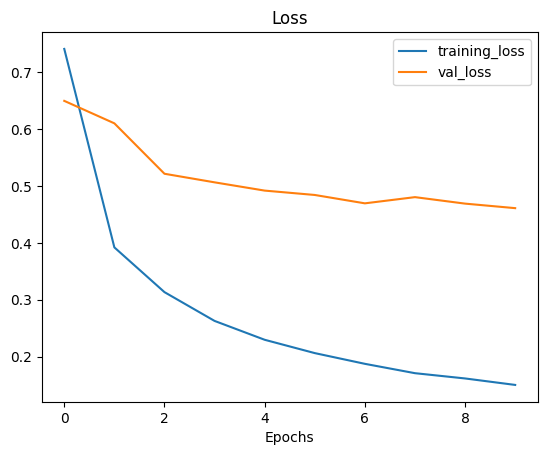

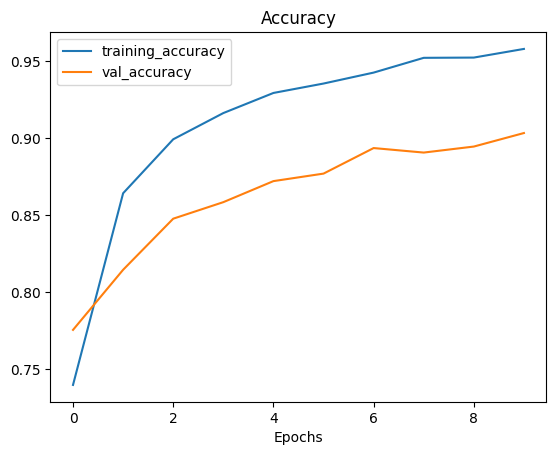

In [36]:
plot_loss_curves(resnet_history)

## PLOT ON ONE Graph

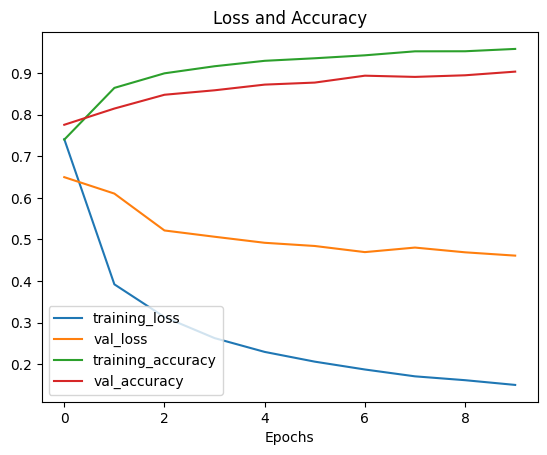

In [40]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
    """
    Plots combined loss and accuracy curves for training and validation metrics.

    Args:
        history: TensorFlow History object.

    Returns:
        Plots of combined training/validation loss and accuracy metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    # Plot loss and accuracy on the same plot
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")

    plt.title("Loss and Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

    # Display the plot
    plt.show()

# Use the function with your history object
plot_loss_and_accuracy(resnet_history)



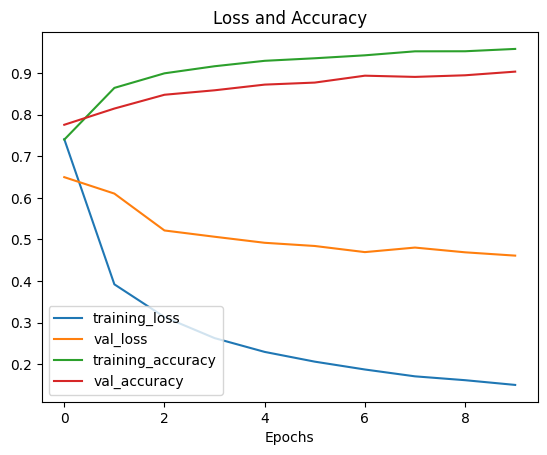

In [39]:

plot_loss_and_accuracy(resnet_history)

In [41]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_lyaer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [42]:
# Evalaute on the test data
resnet_model.evaluate(test_data)

33/33 [==============================] - 6s 189ms/step - loss: 0.4609 - accuracy: 0.9034


[0.46094146370887756, 0.9034146070480347]

In [43]:
print("[INFO] Calculating model accuracy")
scores = resnet_model.evaluate(train_data_10_percent)
print(f"Train Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
190/190 [==============================] - 25s 133ms/step - loss: 0.1329 - accuracy: 0.9666
Train Accuracy: 96.66171073913574


In [44]:
print("[INFO] Calculating model accuracy")
scores = resnet_model.evaluate(test_data)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
33/33 [==============================] - 6s 185ms/step - loss: 0.4609 - accuracy: 0.9034
Test Accuracy: 90.34146070480347


--2023-11-20 05:53:42--  https://raw.githubusercontent.com/HammadSheharyar/FYDP-MODELS/main/cottonDis.webp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214766 (210K) [image/webp]
Saving to: ‘cottonDis.webp’

cottonDis.webp      100%[===================>] 209.73K  --.-KB/s    in 0.03s   

2023-11-20 05:53:43 (6.14 MB/s) - ‘cottonDis.webp’ saved [214766/214766]



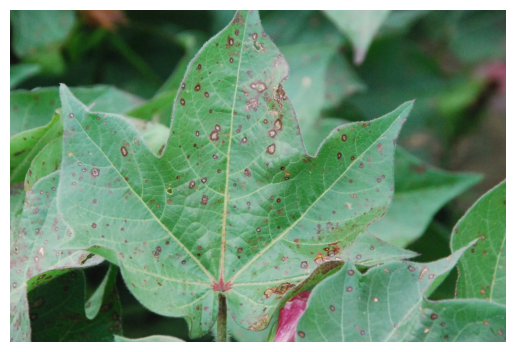

In [45]:
!wget https://raw.githubusercontent.com/HammadSheharyar/FYDP-MODELS/main/cottonDis.webp
disCottonImage = mpimg.imread("cottonDis.webp")
plt.imshow(disCottonImage)
plt.axis(False);

1/1 [==============================] - 0s 26ms/step


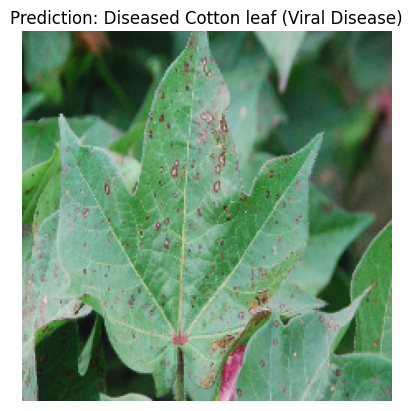

In [49]:
# Make a prediction using resnet_model
pred_and_plot(model=resnet_model,
              filename="cottonDis.webp",
              class_names=class_names)

--2023-11-20 05:54:25--  https://raw.githubusercontent.com/HammadSheharyar/FYDP-MODELS/main/image00433.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26496 (26K) [image/jpeg]
Saving to: ‘image00433.jpg.1’

image00433.jpg.1    100%[===================>]  25.88K  --.-KB/s    in 0.002s  

2023-11-20 05:54:25 (15.3 MB/s) - ‘image00433.jpg.1’ saved [26496/26496]



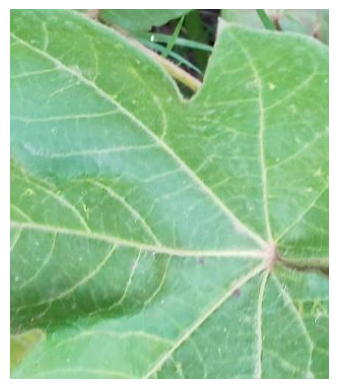

In [50]:
!wget https://raw.githubusercontent.com/HammadSheharyar/FYDP-MODELS/main/image00433.jpg
disCottonImage = mpimg.imread("image00433.jpg")
plt.imshow(disCottonImage)
plt.axis(False);

1/1 [==============================] - 0s 23ms/step


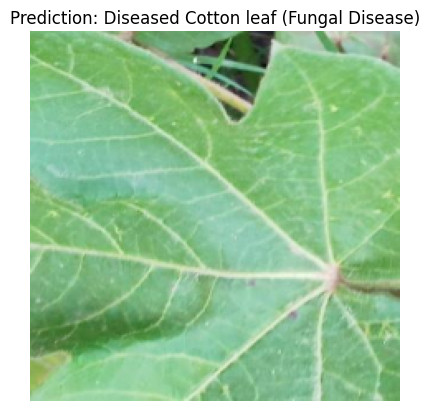

In [51]:
# Make a prediction using model_10
pred_and_plot(model=resnet_model,
              filename="image00433.jpg",
              class_names=class_names)

In [52]:
resnet_model.save('/content/drive/MyDrive/Colab Notebooks/Model/100%_data_plant_disease_Resnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Confusion Matrix

In [53]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [54]:
class_names

array(['Diseased Cotton leaf (Bacterial & Fungal Disease)',
       'Diseased Cotton leaf (Bacterial & Viral Disease)',
       'Diseased Cotton leaf (Bacterial Disease)',
       'Diseased Cotton leaf (Fungal Disease)',
       'Diseased Cotton leaf (Viral & Bacterial Disease)',
       'Diseased Cotton leaf (Viral Disease)', 'Healthy cotton plant',
       'diseased cotton leaf', 'diseased cotton plant',
       'healthy cotton leaf'], dtype='<U49')

In [55]:
# Make some predictions with our model
y_probs = resnet_model.predict(test_data) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

33/33 [==============================] - 7s 188ms/step


array([[1.31560242e-07, 2.86469628e-07, 9.42322367e-04, 9.98938620e-01,
        9.11684947e-06, 1.09246692e-04, 1.10419023e-07, 3.57447121e-08,
        1.11456266e-07, 1.44010732e-08],
       [1.78734725e-03, 1.82785804e-03, 1.43019348e-01, 6.00799203e-01,
        3.59381556e-05, 2.52348870e-01, 2.44045787e-05, 6.89835870e-05,
        2.15437558e-06, 8.59220672e-05],
       [1.28821193e-06, 1.35627511e-06, 2.04439145e-02, 3.86906713e-02,
        1.67999206e-05, 9.40830052e-01, 1.58522511e-07, 1.17272502e-05,
        3.83535644e-06, 2.38591781e-07],
       [1.06989304e-04, 3.11084768e-05, 5.89091629e-02, 4.65923995e-02,
        6.11001497e-06, 8.93768966e-01, 3.50320329e-06, 5.27288707e-04,
        2.27045584e-05, 3.18180209e-05],
       [5.29651106e-12, 4.32695169e-09, 2.74071773e-03, 2.74471585e-02,
        3.09215466e-06, 9.69800234e-01, 1.14153704e-06, 7.27329234e-06,
        3.45107281e-07, 6.32267738e-10]], dtype=float32)

In [56]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]


(array([1.31560242e-07, 2.86469628e-07, 9.42322367e-04, 9.98938620e-01,
        9.11684947e-06, 1.09246692e-04, 1.10419023e-07, 3.57447121e-08,
        1.11456266e-07, 1.44010732e-08], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=3>,
 'Diseased Cotton leaf (Fungal Disease)')

In [57]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([3, 3, 5, 5, 5, 9, 3, 3, 3, 2])

In [93]:
test_data

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=train_data_10_percent,
                 y_pred=y_preds)

ValueError: ignored

## Randomly Predict the Outputs

In [58]:
import matplotlib.pyplot as plt
import random

def plot_random_image(model, dataset, classes):
    # Set up random integer
    i = random.randint(0, len(dataset))

    # Get a random sample from the dataset
    for data, labels in dataset.take(i + 1):
        # Only the last iteration will have the desired sample
        target_image = data.numpy()[0]
        true_label = classes[labels.numpy()[0]]

    # Make predictions
    pred_probs = model.predict(target_image.reshape(1, *IMAGE_SHAPE))
    pred_label = classes[pred_probs.argmax()]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                       100 * tf.reduce_max(pred_probs),
                                                       true_label),
               color=color)  # set the color to green or red based on if prediction is right or wrong
    plt.show()





In [1]:
# Assuming you have an ImageDataGenerator for your test data
test_data_generator = ImageDataGenerator(rescale=1/255.)
num_classes = len(class_names)

# Create a DirectoryIterator from the ImageDataGenerator
test_data_iterator =test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

# Convert the DirectoryIterator to a tf.data.Dataset
# Convert the DirectoryIterator to a tf.data.Dataset
test_data = tf.data.Dataset.from_generator(
    lambda: test_data_iterator,
    output_signature=(
        tf.TensorSpec(shape=(None, IMAGE_SHAPE[0], IMAGE_SHAPE[1], 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32)
    )
)

# Plot a random image from the test set
# Plot a random image from the test set
import numpy as np

# Convert the test_data generator to a NumPy array
test_data_array = np.array(list(test_data))

# Shuffle the array
np.random.shuffle(test_data_array)

# Take the desired number of samples
num_samples = 5  # Choose an appropriate number of samples
for data, labels in test_data_array[:num_samples]:
    # Extract a single image
    target_image = data[0].numpy()  # Convert to NumPy array
    plot_random_image(resnet_model, target_image, class_names)



NameError: ignored